In [ ]:
# Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the path where telecom_analysis.py is located
sys.path.append(os.path.abspath('../scripts'))


# Import functions from telecom_analysis.py
from data_preprocessing import (
    load_data,

)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
# Assuming the CSV file is named 'compbrent_oil_prices.csv'
data = pd.read_csv('../data/BrentOilPrices.csv')



In [2]:
data.head(5)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
# Parse dates without specifying the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Display the first few rows to verify loading

print(data.head())


C:\Users\Yonas\AppData\Local\Temp\ipykernel_8168\80342054.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


 Handle Missing Values

In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop rows with missing values or use interpolation if you want to keep them
data['Price'].interpolate(method='linear', inplace=True)  # Linear interpolation for missing values in Price

# Verify again to make sure no missing values remain
print("Missing values after interpolation:\n", data.isnull().sum())


Missing values:
 Date     0
Price    0
dtype: int64
Missing values after interpolation:
 Date     0
Price    0
dtype: int64


C:\Users\Yonas\AppData\Local\Temp\ipykernel_8168\3554009159.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].interpolate(method='linear', inplace=True)  # Linear interpolation for missing values in Price


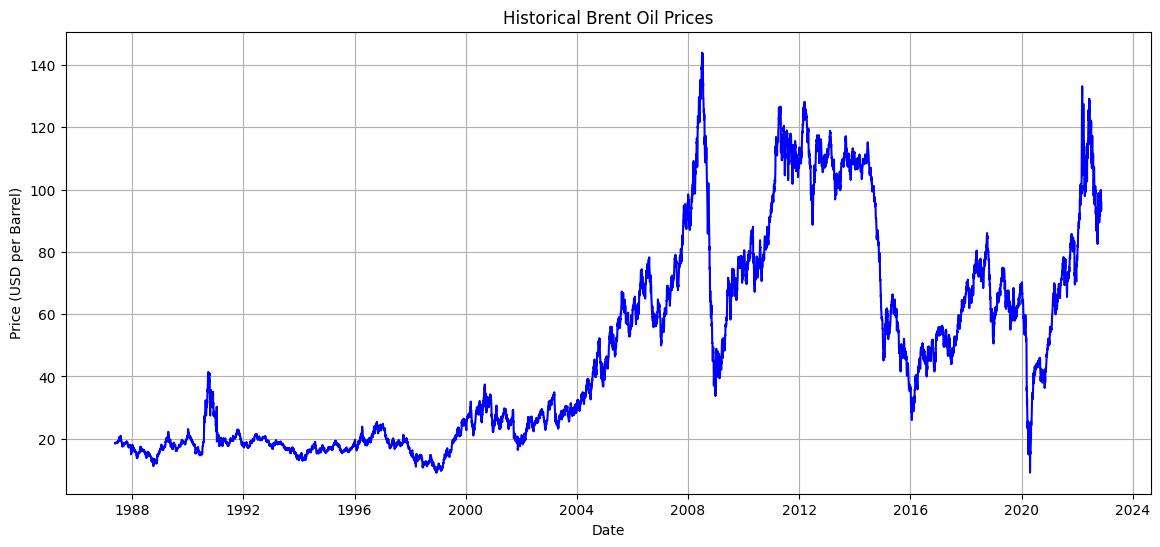

In [5]:
# Set date as the index for easier time-series plotting
data.set_index('Date', inplace=True)

# Plot the Brent oil price over time
plt.figure(figsize=(14, 6))
plt.plot(data['Price'], color='blue')
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.grid(True)
plt.show()


Exploratory Data Analysis (EDA)

Summary Statistics:
 count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


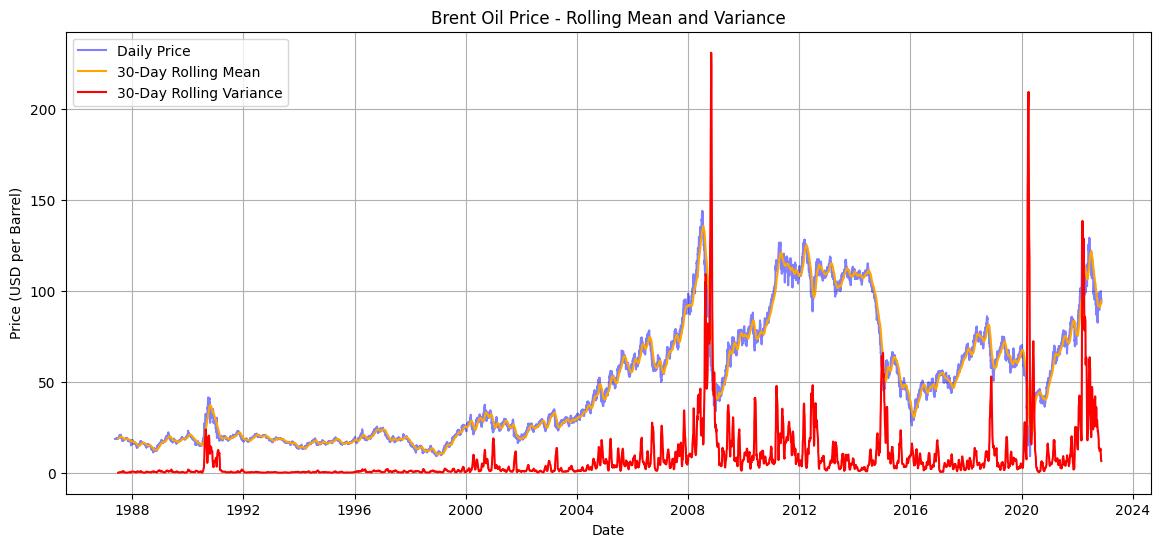

In [6]:
# Summary statistics
print("Summary Statistics:\n", data['Price'].describe())

# Rolling mean and variance to visualize trends and volatility over time
data['Rolling_Mean'] = data['Price'].rolling(window=30).mean()  # 30-day rolling mean
data['Rolling_Variance'] = data['Price'].rolling(window=30).var()  # 30-day rolling variance

# Plot rolling mean and variance
plt.figure(figsize=(14, 6))
plt.plot(data['Price'], color='blue', alpha=0.5, label='Daily Price')
plt.plot(data['Rolling_Mean'], color='orange', label='30-Day Rolling Mean')
plt.plot(data['Rolling_Variance'], color='red', label='30-Day Rolling Variance')
plt.title('Brent Oil Price - Rolling Mean and Variance')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()


Outliers:
 Empty DataFrame
Columns: [Price, Rolling_Mean, Rolling_Variance]
Index: []


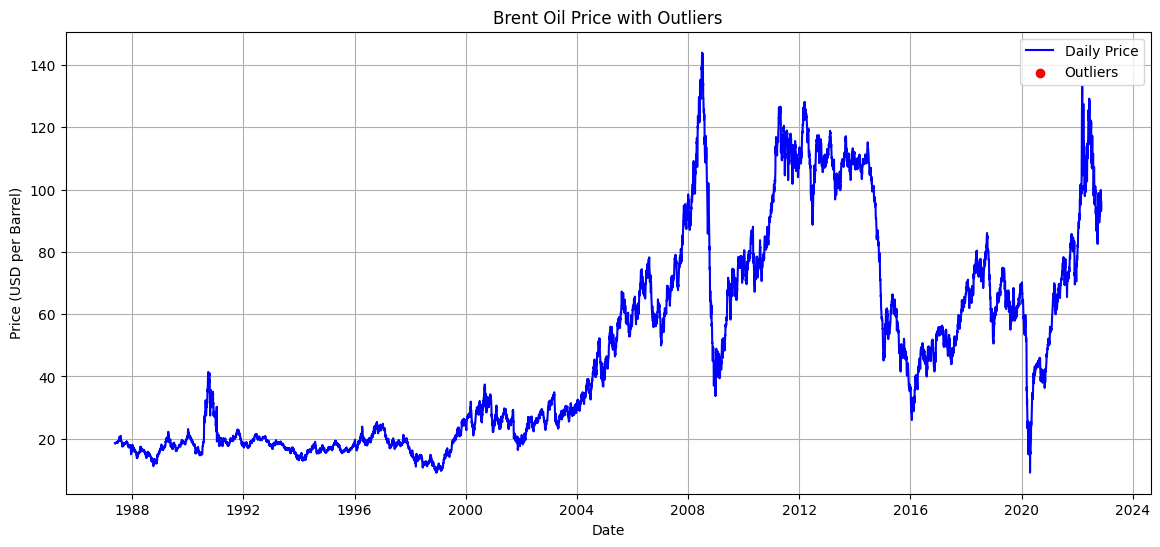

In [7]:
# Detect outliers using the IQR method
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Price'] < (Q1 - 1.5 * IQR)) | (data['Price'] > (Q3 + 1.5 * IQR))]

# Display outliers, if any
print("Outliers:\n", outliers)

# Plotting outliers alongside the price trend
plt.figure(figsize=(14, 6))
plt.plot(data['Price'], color='blue', label='Daily Price')
plt.scatter(outliers.index, outliers['Price'], color='red', label='Outliers')
plt.title('Brent Oil Price with Outliers')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()
